In [88]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score,davies_bouldin_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Reading data set

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df=data.iloc[:,-2:]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## KMeans

In [8]:
### Finding the optimal k value

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    

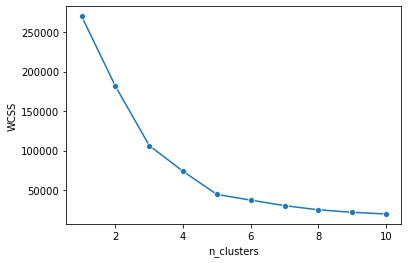

In [15]:
## Plotting elbow curve 

sns.lineplot(range(1,11),wcss,marker='o')
plt.xlabel('n_clusters')
plt.ylabel('WCSS')
plt.show()

#### We can observe that after cluster 5 there is not much difference in WCSS

#### The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

#### the lower the value davies_bouldin_score, the better the separation of the clusters and the 'tightness' inside the clusters.


In [17]:
## creating kmeans with 5 clusters


kmeans = KMeans(n_clusters=5,random_state=42)
kmeans.fit(df)
print(kmeans.inertia_)
print(f"silhouette_score {silhouette_score(df,kmeans.labels_)}")
print(f"davies_bouldin_score {davies_bouldin_score(df,kmeans.labels_)}")


44448.45544793371
silhouette_score 0.553931997444648
davies_bouldin_score 0.5725628995597087


In [36]:
## plotting the clusters

new_df = pd.concat([df,pd.DataFrame(kmeans.labels_,columns=['cluster'])],axis=1)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

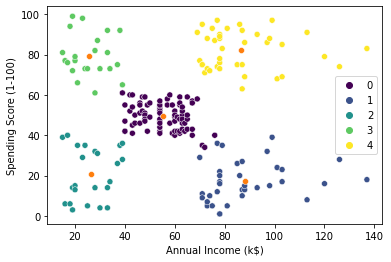

In [45]:
sns.scatterplot(data=new_df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster',palette='viridis')
sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],)

## Agglomerative clustering

In [70]:
agc = AgglomerativeClustering(n_clusters=5)
agc.fit(df)
print(f"silhouette_score {silhouette_score(df,agc.labels_)}")
print(f"davies_bouldin_score {davies_bouldin_score(df,agc.labels_)}")


silhouette_score 0.5529945955148897
davies_bouldin_score 0.5782207452369452


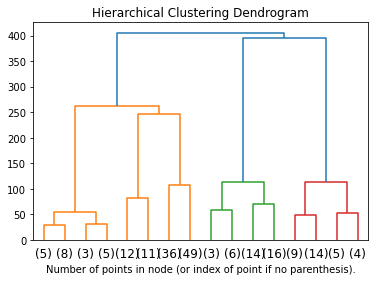

In [67]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



X = df

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## DBSCAN

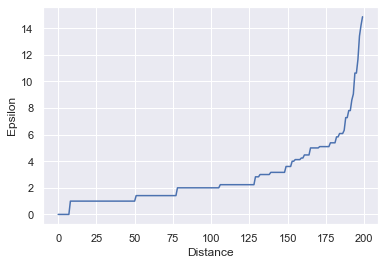

In [144]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
distance = neigh.fit(df)

distances,indices = distance.kneighbors(df)

sort_distances = np.sort(distances,axis=0)

sorted_dist= sort_distances[:,1]
plt.plot(sorted_dist)
plt.xlabel('Distance')
plt.ylabel('Epsilon')
plt.show()

- now we can see that there is sharp rise at eps 9

- One thumb rule for choosing min_sample 
-min_samples >= dimensionality of data



silhouette_score 0.475053701963407
davies_bouldin_score 0.7210872737872664


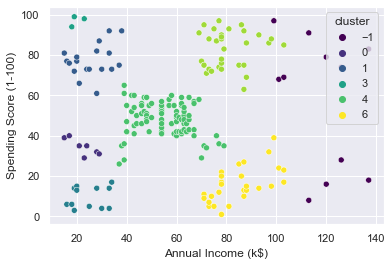

In [150]:
dbs=DBSCAN(eps=9,min_samples=3)
dbs.fit(df)
new_df1 = pd.concat([df,pd.DataFrame(dbs.labels_,columns=['cluster'])],axis=1)
sns.scatterplot(data=new_df1,x='Annual Income (k$)',y='Spending Score (1-100)',hue='cluster',palette='viridis')
print(f"silhouette_score {silhouette_score(df,dbs.labels_)}")
print(f"davies_bouldin_score {davies_bouldin_score(df,dbs.labels_)}")